<a href="https://colab.research.google.com/github/RajkumarGalaxy/ML-Tabular-Data/blob/master/Interpret_ML_with_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create the environment

In [4]:
!pip install shap

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap 
import graphviz
sns.set_style('darkgrid')

# Load data and train a Decision Tree model

In [12]:
# load the famous breast cancer data from sklearn inbuilt datasets
# a supervised binary classification problem
data = load_breast_cancer()
# define predictors as pandas dataframe
X = pd.DataFrame(data['data'], columns=data['feature_names'])
# define target as pandas series
y = pd.Series(data['target'])

In [44]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# sample first few rows and few columns
X_train.iloc[:5, :12]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,0.4537,0.8733
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,0.2666,0.8309
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,0.3833,0.9078


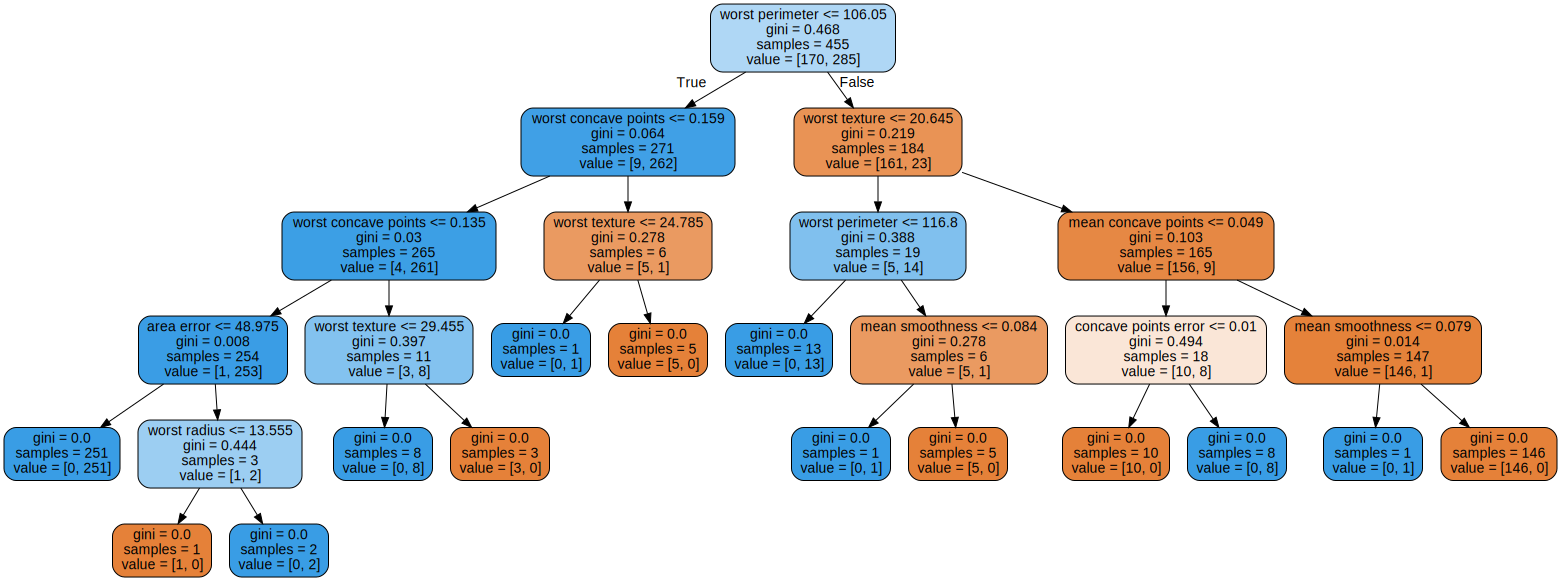

In [124]:
# develop a decision tree model
model = DecisionTreeClassifier(random_state=1, max_depth=5)
#model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=50)

# train the model data
model.fit(X_train, y_train)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model, out_file=None, feature_names = data['feature_names'], rounded=True, filled=True)
graphviz.Source(tree_graph)

# SHAP Force Plot

In [128]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(model)
# obtain shap values for the test data
# we will use these shap values in all of our visualizations hereafter
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

In [139]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

# SHAP Summary Plot

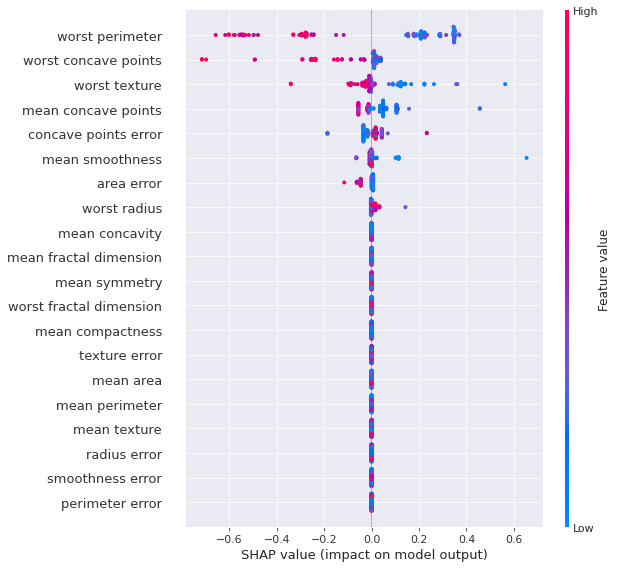

In [140]:
shap.summary_plot(shap_values[1], X_test)

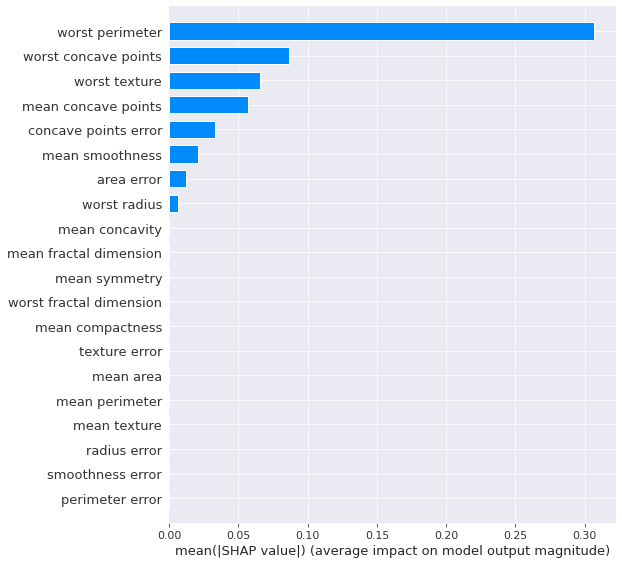

In [141]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

# SHAP Dependence Plot

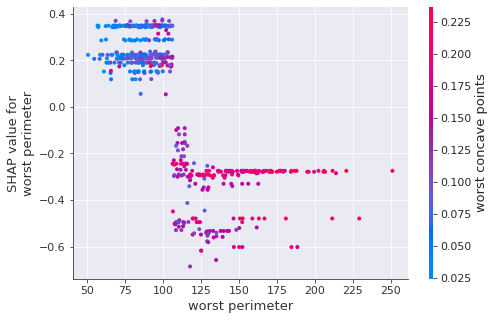

In [143]:
# we use whole of X data from more points on plot
shap_values = explainer.shap_values(X)
shap.dependence_plot('worst perimeter', shap_values[1], X, interaction_index='worst concave points')

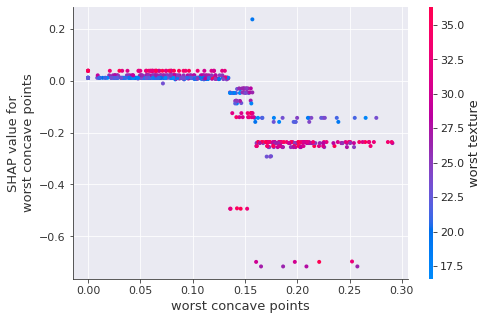

In [158]:
shap.dependence_plot('worst concave points' , shap_values[1], X)

# SHAP Decision Plot

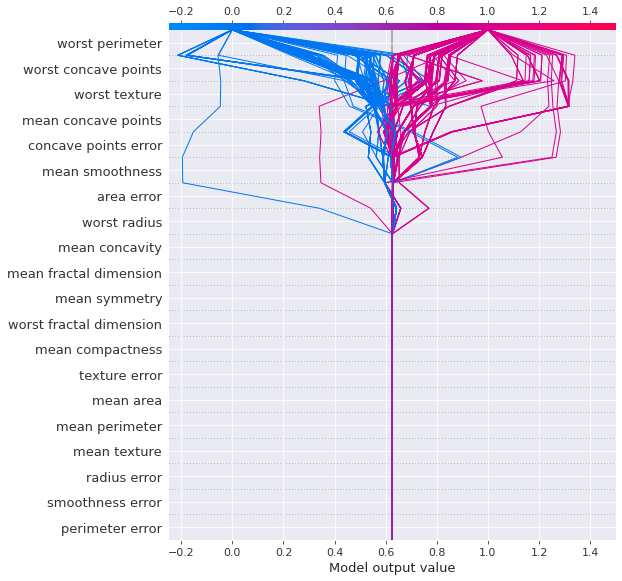

In [150]:

shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

### Thank you for your time!